In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.signal import argrelextrema

In [3]:
%matplotlib inline
import pylab as pl

In [4]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

In [5]:
import math

In [6]:
from sklearn.cluster import KMeans
from src2.utils import *

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
def add_labels(x_list, y_list, labels):
    for x,y,label in zip(x_list, y_list, labels):
        plt.text(x+0.25, y-0.25, label)

In [8]:
def make_test_data(seg_count, point_count):
    x = np.random.uniform(2, 10, seg_count)
    x = np.cumsum(x)
    x *= 10 / x.max()
    y = np.cumsum(np.random.uniform(-1, 1, seg_count))
    X = np.random.uniform(0, 10, point_count)
    Y = np.interp(X, x, y) + np.random.normal(0, 0.05, point_count)
    return X, Y

In [9]:
from scipy import optimize

def segments_fit(X, Y, count):
    xmin = X.min()
    xmax = X.max()

    seg = np.full(count - 1, (xmax - xmin) / count)

    px_init = np.r_[np.r_[xmin, seg].cumsum(), xmax]
    py_init = np.array([Y[np.abs(X - x) < (xmax - xmin) * 0.01].mean() for x in px_init])

    def func(p):
        seg = p[:count - 1]
        py = p[count - 1:]
        px = np.r_[np.r_[xmin, seg].cumsum(), xmax]
        return px, py

    def err(p):
        px, py = func(p)
        Y2 = np.interp(X, px, py)
        return np.mean((Y - Y2)**2)

    r = optimize.minimize(err, x0=np.r_[seg, py_init], method='Nelder-Mead')
    return func(r.x)

In [10]:
df=pd.read_csv("./sensor.csv")
df["Timestamp"] = pd.to_datetime(df["timestamp"])
df_gb = df.groupby(pd.Grouper(key="Timestamp", axis=0, freq="D")).mean()
df_gb.reset_index(inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

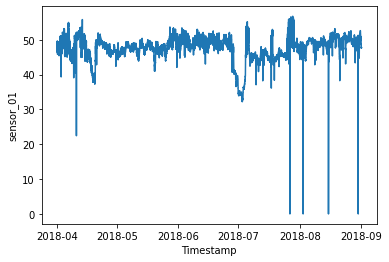

In [11]:
sns.lineplot(x="Timestamp", y="sensor_01", data=df)
plt.show

In [4]:
df_new=pd.read_csv("./sensor_1.csv")
df_new["Timestamp"] = pd.to_datetime(df_new["timestamp"])
df_new_gb = df_new.groupby(pd.Grouper(key="Timestamp", axis=0, freq="D")).mean()
df_new_gb.reset_index(inplace=True)
df_new_gb

,Timestamp,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
0,2018-04-01,719.5,2.454139,47.318882,52.567363,45.273315,634.166035,74.516172,13.348212,16.161459,...,32.626770,40.682243,50.859817,51.617557,45.070015,39.786884,197.029723,92.171022,241.056817,217.054678
1,2018-04-02,2159.5,2.429367,48.595226,52.199163,44.094026,635.990899,77.960694,13.340421,16.161022,...,33.555409,43.272566,46.112437,66.206316,53.731031,40.172284,203.099479,73.322964,243.407801,205.087368
2,2018-04-03,3599.5,2.435093,49.266702,52.060062,44.336599,640.359938,76.903797,13.452223,16.301238,...,34.660190,42.534900,44.204121,47.936961,42.168222,40.946113,157.432927,64.259821,201.386879,201.646492
3,2018-04-04,5039.5,2.452493,50.429565,51.959000,45.096479,640.173640,75.858830,13.512238,16.511281,...,34.545354,43.123188,42.631220,45.638222,43.511485,40.603311,154.669415,67.019917,213.312395,204.283411
4,2018-04-05,6479.5,2.454101,49.353086,52.096564,43.982806,636.350491,76.824878,13.425036,16.227121,...,33.312353,42.356406,45.254630,46.999582,44.231047,39.532897,213.241463,82.239020,240.274159,234.841377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2018-08-27,213839.5,2.397325,49.077267,50.995007,44.272972,629.476285,75.191813,14.732405,16.555016,...,31.871201,44.036998,45.100107,45.915163,54.741151,41.868824,265.343482,75.546955,NaN,215.756213
149,2018-08-28,215279.5,2.484509,48.750963,50.825465,44.272459,631.976319,72.276470,15.060769,16.604658,...,31.891636,43.499707,46.501254,60.823367,61.883520,42.537334,282.142366,72.129388,NaN,217.672568
150,2018-08-29,216719.5,2.462678,48.388881,51.325923,44.761404,629.564036,76.858206,15.095380,16.576662,...,32.484627,43.391200,51.786748,65.166860,61.894571,42.187888,313.535835,87.895648,NaN,217.231304
151,2018-08-30,218159.5,2.440611,49.141889,51.904927,45.522188,628.580324,73.744396,15.075095,16.537262,...,33.278354,42.855538,57.698969,55.559976,56.916112,45.339225,280.001366,95.470236,NaN,221.649949


In [3]:
df = pd.read_csv("sensor_1.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,NORMAL
220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,NORMAL
220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,NORMAL
220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856,NORMAL


In [4]:
df["machine_status"] = pd.Categorical(df["machine_status"])
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [8]:
def relabel_machine_status(x):
    if x == "BROKEN" or x == "RECOVERING":
        return "ABNORMAL"
    else:
        return x

In [9]:
df["relabelled_machine_status"] = df["machine_status"].apply(relabel_machine_status)

In [10]:
def numerical_machine_status(x):
    if x=="NORMAL":
        return 0
    else:
        return -1

In [11]:
df["relabelled_machine_status_numerical"] = df["relabelled_machine_status"].apply(numerical_machine_status)

In [13]:
df_gb2 = df.groupby(pd.Grouper(key="timestamp", axis=0, freq="D")).mean()
df_gb2.reset_index(inplace=True)
df_gb2

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,relabelled_machine_status_numerical
0,2018-04-01,2.454139,47.318882,52.567363,45.273315,634.166035,74.516172,13.348212,16.161459,15.680862,...,40.682243,50.859817,51.617557,45.070015,39.786884,197.029723,92.171022,241.056817,217.054678,0.0
1,2018-04-02,2.429367,48.595226,52.199163,44.094026,635.990899,77.960694,13.340421,16.161022,15.643311,...,43.272566,46.112437,66.206316,53.731031,40.172284,203.099479,73.322964,243.407801,205.087368,0.0
2,2018-04-03,2.435093,49.266702,52.060062,44.336599,640.359938,76.903797,13.452223,16.301238,15.738662,...,42.534900,44.204121,47.936961,42.168222,40.946113,157.432927,64.259821,201.386879,201.646492,0.0
3,2018-04-04,2.452493,50.429565,51.959000,45.096479,640.173640,75.858830,13.512238,16.511281,15.533056,...,43.123188,42.631220,45.638222,43.511485,40.603311,154.669415,67.019917,213.312395,204.283411,0.0
4,2018-04-05,2.454101,49.353086,52.096564,43.982806,636.350491,76.824878,13.425036,16.227121,15.658517,...,42.356406,45.254630,46.999582,44.231047,39.532897,213.241463,82.239020,240.274159,234.841377,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2018-08-27,2.397325,49.077267,50.995007,44.272972,629.476285,75.191813,14.732405,16.555016,15.722818,...,44.036998,45.100107,45.915163,54.741151,41.868824,265.343482,75.546955,NaN,215.756213,0.0
149,2018-08-28,2.484509,48.750963,50.825465,44.272459,631.976319,72.276470,15.060769,16.604658,15.663053,...,43.499707,46.501254,60.823367,61.883520,42.537334,282.142366,72.129388,NaN,217.672568,0.0
150,2018-08-29,2.462678,48.388881,51.325923,44.761404,629.564036,76.858206,15.095380,16.576662,15.673291,...,43.391200,51.786748,65.166860,61.894571,42.187888,313.535835,87.895648,NaN,217.231304,0.0
151,2018-08-30,2.440611,49.141889,51.904927,45.522188,628.580324,73.744396,15.075095,16.537262,15.647450,...,42.855538,57.698969,55.559976,56.916112,45.339225,280.001366,95.470236,NaN,221.649949,0.0


In [20]:
df_gb2[df_gb2["relabelled_machine_status_numerical"]!=0]

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,relabelled_machine_status_numerical
11,2018-04-12,2.437931,51.749251,52.681634,45.740920,578.894992,69.873236,12.535274,15.228432,14.339816,...,44.578967,50.404327,52.840470,44.695417,43.891487,194.545114,80.769355,245.697497,226.482725,-0.086806
12,2018-04-13,1.452210,48.173013,49.750794,43.442833,214.360236,33.691159,8.174832,13.078452,13.135429,...,51.289422,43.825754,45.477270,50.918089,40.905511,55.161916,48.640312,66.242130,67.456557,-0.569444
17,2018-04-18,2.002089,40.888492,41.915138,38.578071,87.888973,10.592319,3.941646,6.030575,8.459866,...,36.125380,35.599125,34.790387,33.937212,33.895588,40.634732,43.521615,54.237487,57.896309,-0.979167
18,2018-04-19,NaN,38.908211,38.473547,36.070179,110.481518,0.000000,1.785889,2.736349,5.912894,...,41.035335,32.581019,32.464876,36.484656,36.091821,34.667366,35.398381,35.362212,35.833816,-1.000000
19,2018-04-20,1.511378,46.218833,41.769082,37.467266,421.807565,51.930164,10.404469,14.046243,13.782441,...,69.781899,41.238881,45.745322,58.808152,43.062186,59.045460,46.159706,81.859447,78.395879,-0.181250
48,2018-05-19,0.412271,46.221305,48.122318,42.137073,345.945130,18.848932,10.379518,14.675563,12.485568,...,39.895288,33.663074,33.413307,37.098323,35.510077,52.407661,39.628947,75.769797,71.025230,-0.862500
49,2018-05-20,1.582449,44.878622,47.937252,41.104358,526.755022,55.151266,11.742058,13.690542,13.518046,...,50.499672,40.571135,42.382261,49.302139,41.750257,73.083848,47.438231,123.854849,108.601639,-0.049306
54,2018-05-25,1.139083,46.254942,48.976084,42.760325,396.350080,44.180928,10.531628,14.404015,13.913900,...,49.212598,42.255618,44.827433,49.624043,46.482365,81.472063,59.541993,95.817283,92.316905,-0.420833
88,2018-06-28,1.498752,45.309485,48.829811,42.463830,428.270233,67.409976,11.920251,15.378859,15.092808,...,37.910877,37.318151,40.412407,48.489744,39.420573,57.935072,44.253352,110.120898,NaN,-0.083333
89,2018-06-29,0.019317,40.002200,40.681272,39.013761,116.877800,61.153302,10.015114,12.018604,11.855092,...,29.537578,31.045243,31.224280,31.373377,32.378874,31.611087,31.949066,35.293089,NaN,-1.000000


In [23]:
def etat_err_gb(x):
    if x==0:
        return 0
    else:
        return -1

In [26]:
df_gb2["statu_gb"] = df_gb2["relabelled_machine_status_numerical"].apply(etat_err_gb)

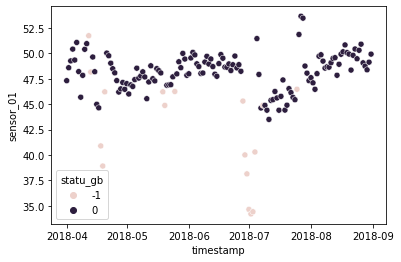

In [27]:
sns.scatterplot(x="timestamp", y="sensor_01", hue="statu_gb",data=df_gb2)
plt.show()

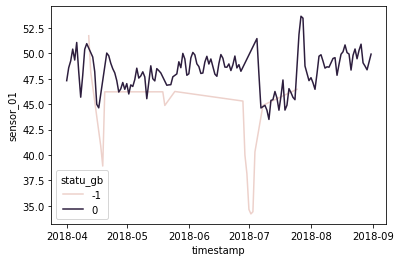

In [28]:
sns.lineplot(x="timestamp", y="sensor_01", hue="statu_gb",data=df_gb2)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

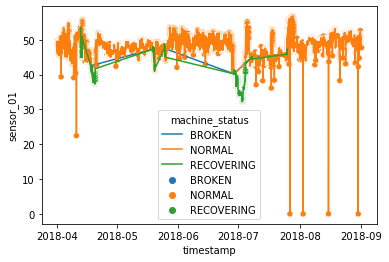

In [5]:
sns.scatterplot(x="timestamp", y="sensor_01", hue="machine_status",data=df)
sns.lineplot(x="timestamp", y="sensor_01", hue="machine_status",data=df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

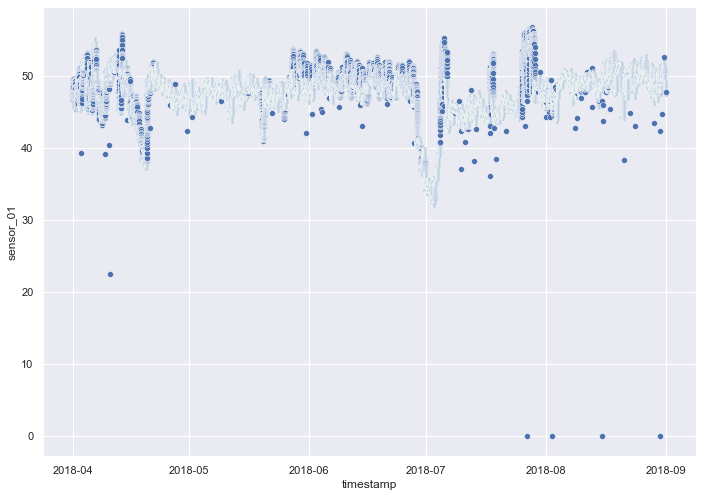

In [13]:
sns.scatterplot(x="timestamp", y="sensor_01",data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

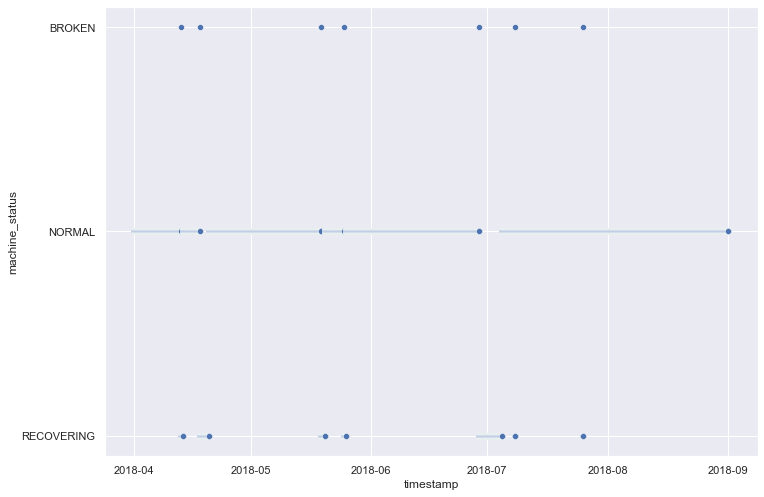

In [14]:
sns.scatterplot(x="timestamp", y="machine_status",data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

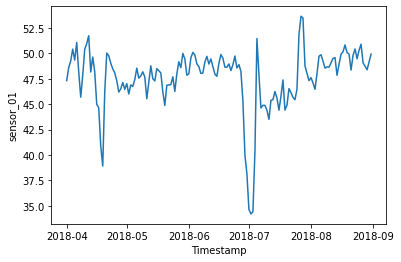

In [12]:
sns.lineplot(x="Timestamp", y="sensor_01", data=df_gb)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

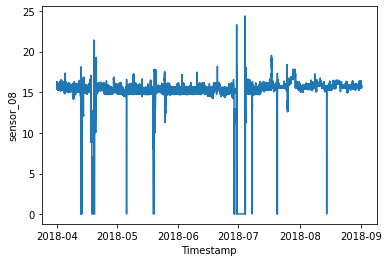

In [13]:
sns.lineplot(x="Timestamp", y="sensor_08", data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

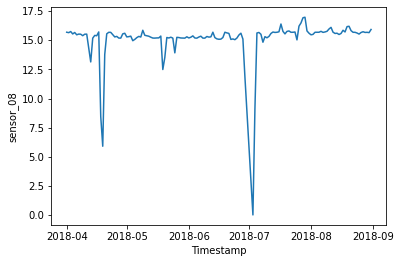

In [14]:
sns.lineplot(x="Timestamp", y="sensor_08", data=df_gb)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

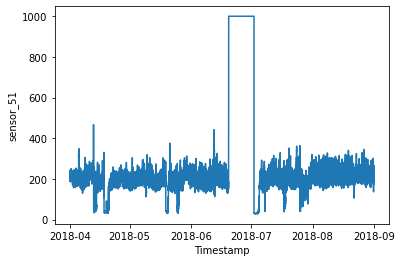

In [15]:
sns.lineplot(x="Timestamp", y="sensor_51", data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

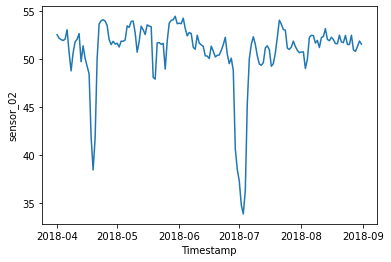

In [92]:
sns.lineplot(x="Timestamp", y="sensor_02", data=df_gb)
plt.show

In [16]:
# loess sensor 1

<function matplotlib.pyplot.show(close=None, block=None)>

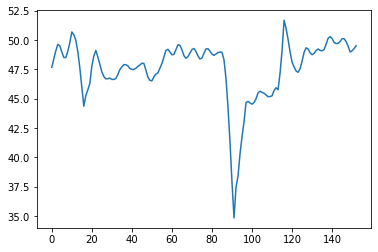

In [93]:
x1=pd.to_numeric(df_gb.index)
y1=pd.to_numeric(df_gb.sensor_01)
result1 = lowess(y1, x1, frac=0.05, it=3, delta=0.0)
ar1 =[]
for i in range(len(result1[0])):
    b =[]
    for j in range(len(result1)):
        b.append(result1[j][i])
    ar1.append(b)
sns.lineplot(x=ar1[0], y=ar1[1])
plt.show

In [18]:
# loess sensor8

<function matplotlib.pyplot.show(close=None, block=None)>

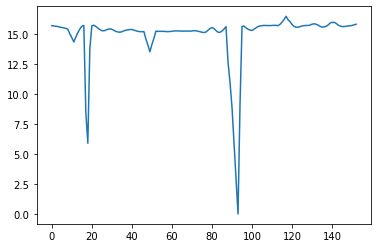

In [19]:
x8=pd.to_numeric(df_gb.index)
y8=pd.to_numeric(df_gb.sensor_08)
result8 = lowess(y8, x8, frac=0.05, it=3, delta=0.0)
ar8 =[]
for i in range(len(result8[0])):
    b =[]
    for j in range(len(result8)):
        b.append(result8[j][i])
    ar8.append(b)
sns.lineplot(x=ar8[0], y=ar8[1])
plt.show

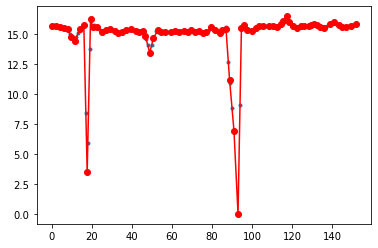

In [20]:
y8[y8.isnull()] = 0
ya8 = np.array(y8.values.tolist())
maxs8 = list(argrelextrema(ya8, np.greater)[0])
mins8 = list(argrelextrema(ya8, np.less)[0])
extreme8 = maxs8+mins8
extreme_single8 = list({d:None for d in extreme8}.keys())
px8, py8 = segments_fit(np.array(ar8[0]), np.array(ar8[1]), len(extreme_single8))
pl.plot(np.array(ar8[0]), np.array(ar8[1]), ".")
pl.plot(px8, py8, "-or")

In [21]:
# lpx8 = list(px8)
# lpy8 = list(py8)
# lstate8=[]
# for i in range(len(lpx8)-1):
#     lstate8.append(np.arccos((lpy8[i+1]-lpy8[i])/((lpx8[i+1]-lpx8[i])*10)))

In [22]:
# quali_state8 = []
# colors8 = []
# for i in lstate8 : 
#     if 0<i<math.pi/6:
#         quali_state8.append(0)
#         colors8.append("red")
#     elif math.pi/6<i<2*math.pi/6:
#         quali_state8.append(1)
#         colors8.append("orange")
#     elif 2*math.pi/6<i<3*math.pi/6:
#         quali_state8.append(2)
#         colors8.append("yellow")
#     elif 3*math.pi/6<i<4*math.pi/6:
#         quali_state8.append(3)
#         colors8.append("cornflowerblue")
#     elif 4*math.pi/6<i<5*math.pi/6:
#         quali_state8.append(4)
#         colors8.append("blue")
#     elif 5*math.pi/6<i<6*math.pi/6:
#         quali_state8.append(5)
#         colors8.append("violet")
#     else:
#         quali_state8.append(6)
#         colors8.append("tomato")
# df_state8 = pd.DataFrame({'val_ongle': pd.Series(lstate8), 'state': pd.Series(quali_state8)})
# df_state8

In [23]:
# tab_proba8 = []
# for i in range(7):
#     tab_proba8.append([])
# for i in range(7):    
#     for j in range(7):
#         tab_proba8[i].append(0)
# for i in range(len(df_state8["state"])-1):
#     a=df_state8["state"][i]
#     b=df_state8["state"][i+1]
#     tab_proba8[a][b]=tab_proba8[a][b]+1
# tab_proba8

In [24]:
# pl.plot(np.array(ar8[0]), np.array(ar8[1]), ".")
# pl.plot(px8, py8, "-or")
# pl.plot(px8[:-1], colors8, ".")

In [25]:
# train data

In [26]:
#classification : kmeans

In [27]:
tab_dis8 = []
for i in range(len(ar8[0])):
    tab_dis8.append([])
for i in range(len(ar8[0])):    
    for j in range(len(ar8[1])):
        tab_dis8[i].append([])
for i in range(len(ar8[0])):
    for j in range(len(ar8[1])):
        tab_dis8[i][j] = abs(ar8[1][i] - ar8[1][j] )
df_dist8 = pd.DataFrame(tab_dis8)
df_dist8

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,0.000000,0.022099,0.046242,0.068917,0.119625,0.150154,0.185742,0.225141,0.291134,0.677207,...,0.055582,0.030789,0.071418,0.071046,0.051974,0.023103,0.010801,0.023241,0.069943,0.120565
1,0.022099,0.000000,0.024142,0.046818,0.097526,0.128055,0.163643,0.203041,0.269034,0.655107,...,0.077682,0.008690,0.049318,0.048946,0.029875,0.001004,0.011299,0.045341,0.092042,0.142664
2,0.046242,0.024142,0.000000,0.022675,0.073384,0.103912,0.139501,0.178899,0.244892,0.630965,...,0.101824,0.015453,0.025176,0.024804,0.005733,0.023139,0.035441,0.069483,0.116185,0.166807
3,0.068917,0.046818,0.022675,0.000000,0.050708,0.081237,0.116825,0.156223,0.222217,0.608289,...,0.124499,0.038128,0.002500,0.002129,0.016943,0.045814,0.058117,0.092159,0.138860,0.189482
4,0.119625,0.097526,0.073384,0.050708,0.000000,0.030529,0.066117,0.105515,0.171508,0.557581,...,0.175208,0.088836,0.048208,0.048580,0.067651,0.096522,0.108825,0.142867,0.189568,0.240191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.023103,0.001004,0.023139,0.045814,0.096522,0.127051,0.162639,0.202037,0.268031,0.654103,...,0.078685,0.007686,0.048314,0.047943,0.028871,0.000000,0.012303,0.046344,0.093046,0.143668
147,0.010801,0.011299,0.035441,0.058117,0.108825,0.139353,0.174942,0.214340,0.280333,0.666406,...,0.066383,0.019989,0.060617,0.060245,0.041174,0.012303,0.000000,0.034042,0.080744,0.131366
148,0.023241,0.045341,0.069483,0.092159,0.142867,0.173395,0.208984,0.248382,0.314375,0.700448,...,0.032341,0.054031,0.094659,0.094287,0.075216,0.046344,0.034042,0.000000,0.046702,0.097324
149,0.069943,0.092042,0.116185,0.138860,0.189568,0.220097,0.255685,0.295084,0.361077,0.747150,...,0.014361,0.100732,0.141361,0.140989,0.121917,0.093046,0.080744,0.046702,0.000000,0.050622


In [28]:
cls = KMeans(n_clusters=3, init="random")
cls.fit(df_dist8)
labels_k = pd.Series(cls.labels_, name="K-means")
n1=len(labels_k[labels_k==0])
n2=len(labels_k[labels_k==1])
n3=len(labels_k[labels_k==2])
if n1 > max(n2,n3):
    labels_k[labels_k==0] = 4
    if n2 > n3:
        labels_k[labels_k==1] = 5
        labels_k[labels_k==2] = 6
    else:
        labels_k[labels_k==1] = 6
        labels_k[labels_k==2] = 5
elif n2 > max(n1,n3):
    labels_k[labels_k==1] = 4
    if n1 > n3:
        labels_k[labels_k==0] = 5
        labels_k[labels_k==2] = 6
    else:
        labels_k[labels_k==0] = 6
        labels_k[labels_k==2] = 5
else:
    labels_k[labels_k==3] = 4
    if n1 > n2:
        labels_k[labels_k==0] = 5
        labels_k[labels_k==1] = 6
    else:
        labels_k[labels_k==0] = 6
        labels_k[labels_k==1] = 5

In [29]:
labels_k[labels_k==4] = 0
labels_k[labels_k==5] = 1
labels_k[labels_k==6] = 2

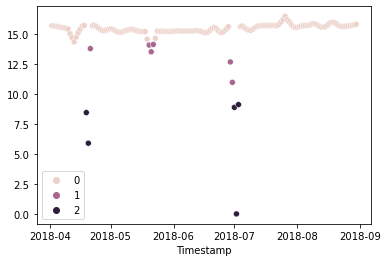

In [30]:
list_labels_k = labels_k.to_list()
sns.scatterplot(x = df_gb["Timestamp"][1:-1], y=ar8[1], hue=list_labels_k)
plt.show()

In [31]:
# cls = KMeans(n_clusters=5, init="random")
# cls.fit(df_dist8)
# labels_k = pd.Series(cls.labels_, name="K-means")
# list_labels_k = labels_k.to_list()
# sns.scatterplot(x = df_gb["Timestamp"][1:-1], y=ar8[1], hue=list_labels_k)
# plt.show()

In [32]:
#transition matrix for markovain

In [33]:
tab_proba=[]
for i in range(3):
    tab_proba.append([])
for i in range(3):    
    for j in range(3):
        tab_proba[i].append(0)
tab_proba

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [34]:
for i in range(len(labels_k)-1) : 
    a=labels_k[i]
    b=labels_k[i+1]
    tab_proba[a][b] = tab_proba[a][b]+1 
for i in range(3):
    sum_ligne = sum(tab_proba[i])
for j in range(3):
    tab_proba[i][j] = tab_proba[i][j]/sum_ligne 
tab_proba

[[136, 2, 1], [2, 3, 1], [0.2, 0.2, 0.6]]

In [35]:
transitionMatrix=tab_proba
if sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[1]) != 3:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay, you should move on!! ;)")


Somewhere, something went wrong. Transition matrix, perhaps?


In [36]:
def trouver_transitionMatrix(array_labels,dim):
    tab_proba=[]
    for i in range(dim):
        tab_proba.append([])
    for i in range(dim):    
        for j in range(dim):
            tab_proba[i].append(0)
    
    for i in range(len(array_labels)-1) : 
        a=array_labels[i]
        b=array_labels[i+1]
        tab_proba[a][b] = tab_proba[a][b]+1 
    for i in range(dim):
        sum_ligne = sum(tab_proba[i])
        for j in range(dim):
            tab_proba[i][j] = tab_proba[i][j]/sum_ligne
    return tab_proba

In [70]:
def calculate_list_state(string_nom_sensor):
    # lowess
    x=pd.to_numeric(df_gb.index)
    y=pd.to_numeric(df_gb[string_nom_sensor])
    result = lowess(y, x, frac=0.05, it=3, delta=0.0)
    ar =[]
    for i in range(len(result[0])):
        b =[]
        for j in range(len(result)):
            b.append(result[j][i])
        ar.append(b)
    #matrix distance
    tab_dist = []
    for i in range(len(ar[0])):
        tab_dist.append([])
    for i in range(len(ar[0])):    
        for j in range(len(ar[1])):
            tab_dist[i].append([])
    for i in range(len(ar[0])):
        for j in range(len(ar[1])):
            tab_dist[i][j] = abs(ar[1][i] - ar[1][j] )
    #cliassification : k-means
    cls = KMeans(n_clusters=3, init="random")
    cls.fit(tab_dist)
    labels_k = pd.Series(cls.labels_, name="K-means")
    # classer de nb plus à moins(proba plus : normal -> abnormal)
    n1=len(labels_k[labels_k==0])
    n2=len(labels_k[labels_k==1])
    n3=len(labels_k[labels_k==2])
    if n1 > max(n2,n3):
        labels_k[labels_k==0] = 4
        if n2 > n3:
            labels_k[labels_k==1] = 5
            labels_k[labels_k==2] = 6
        else:
            labels_k[labels_k==1] = 6
            labels_k[labels_k==2] = 5
    elif n2 > max(n1,n3):
        labels_k[labels_k==1] = 4
        if n1 > n3:
            labels_k[labels_k==0] = 5
            labels_k[labels_k==2] = 6
        else:
            labels_k[labels_k==0] = 6
            labels_k[labels_k==2] = 5
    else:
        labels_k[labels_k==3] = 4
        if n1 > n2:
            labels_k[labels_k==0] = 5
            labels_k[labels_k==1] = 6
        else:
            labels_k[labels_k==0] = 6
            labels_k[labels_k==1] = 5
    list_labels_k = []
    labels_k[labels_k==4] = 0
    labels_k[labels_k==5] = 1
    labels_k[labels_k==6] = 2
    #to list
    # list_labels_k = labels_k.to_list()
    return labels_k,ar # list state for this sensor

In [71]:
a=2

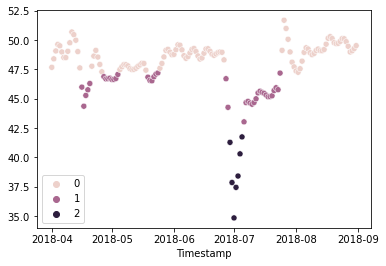

In [72]:
state_sensor1,valeur_lowess_sensor1 = calculate_list_state("sensor_01")
list_state_sensor1 = state_sensor1.to_list()
sns.scatterplot(x = df_gb["Timestamp"], y=valeur_lowess_sensor1[1], hue=list_state_sensor1)
plt.show()

In [73]:
transitionMatrix1 = trouver_transitionMatrix(state_sensor1,3)
transitionMatrix1

[[0.9619047619047619, 0.0380952380952381, 0.0],
 [0.1, 0.875, 0.025],
 [0.0, 0.14285714285714285, 0.8571428571428571]]

In [74]:
if sum(transitionMatrix1[0])+sum(transitionMatrix1[1])+sum(transitionMatrix1[1]) != 3:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay, you should move on!! ;)")

All is gonna be okay, you should move on!! ;)


In [75]:
a=1

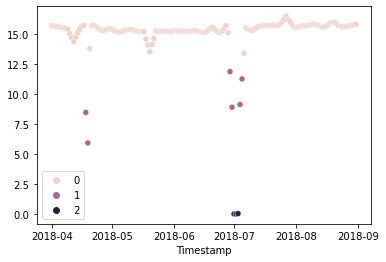

In [76]:
state_sensor8,valeur_lowess_sensor8 = calculate_list_state("sensor_08")
list_state_sensor8 = state_sensor8.to_list()
sns.scatterplot(x = df_gb["Timestamp"], y=valeur_lowess_sensor8[1], hue=list_state_sensor8)
plt.show()

In [77]:
state_sensor1

0      0
1      0
2      0
3      0
4      0
      ..
148    0
149    0
150    0
151    0
152    0
Name: K-means, Length: 153, dtype: int32

In [78]:
state_sensor8

0      0
1      0
2      0
3      0
4      0
      ..
148    0
149    0
150    0
151    0
152    0
Name: K-means, Length: 153, dtype: int32

In [79]:
transitionMatrix8 = trouver_transitionMatrix(state_sensor8,3)
transitionMatrix8

[[0.986013986013986, 0.013986013986013986, 0.0],
 [0.3333333333333333, 0.5, 0.16666666666666666],
 [0.0, 0.3333333333333333, 0.6666666666666666]]

In [80]:
if sum(transitionMatrix8[0])+sum(transitionMatrix8[1])+sum(transitionMatrix8[1]) != 3:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay, you should move on!! ;)")

All is gonna be okay, you should move on!! ;)


In [81]:
# train data : transitionMatrix8

In [82]:
# test data : list_state_sensor1

In [83]:
transitionMatrix8

[[0.986013986013986, 0.013986013986013986, 0.0],
 [0.3333333333333333, 0.5, 0.16666666666666666],
 [0.0, 0.3333333333333333, 0.6666666666666666]]

In [84]:
# tab_pb_res1=[]
# for i in range(len(list_state_sensor1)):
#     tab_pb_res1.append(1)
# # tab_pb_res1

In [85]:
# for i in range(len(list_state_sensor1)-5) :
#     nb_proba = 1
#     for j in range(5) :
#         nb_proba = nb_proba * transitionMatrix8[list_state_sensor1[i+j]][list_state_sensor1[i+j+1]]
#     tab_pb_res1[i+j+1] = nb_proba
# # tab_pb_res1

In [86]:
# tab_label  = []
# for i in tab_pb_res1:
#     if i > 0.5:
#         tab_label.append("OK")
#     else :
#         tab_label.append("Erreur")
# # tab_label

In [87]:
# sns.scatterplot(x = df_gb["Timestamp"], y=valeur_lowess_sensor1[1], hue=tab_label)
# plt.show()

In [88]:
def trouver_tabres_proba_markovain(list_state_sensor_but, transitionMatrix):
    tab_pb_res=[]
    for i in range(len(list_state_sensor_but)):
        tab_pb_res.append(1)
    for i in range(len(list_state_sensor_but)-5) :
        nb_proba = 1
        for j in range(5) :
            nb_proba = nb_proba * transitionMatrix[list_state_sensor_but[i+j]][list_state_sensor_but[i+j+1]]
        tab_pb_res[i+j+1] = nb_proba
    return tab_pb_res

In [89]:
def trouver_OK_Erreur_Label(tab_pb_res):
    tab_label  = []
    for i in tab_pb_res:
        if i > 0.5:
            tab_label.append("OK")
        else :
            tab_label.append("Erreur")
    return tab_label

In [90]:
tab_pb_res1 = trouver_tabres_proba_markovain(list_state_sensor1,transitionMatrix8)
tab_label1 = trouver_OK_Erreur_Label(tab_pb_res1)

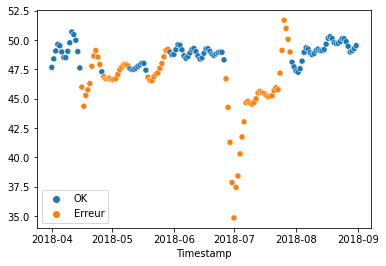

In [91]:
sns.scatterplot(x = df_gb["Timestamp"], y=valeur_lowess_sensor1[1], hue=tab_label1)
plt.show()

In [96]:
# it's possible that it has some errors of lance in first time 
# it's not problem of logique, it's ptoblem of stockage or else that i don't realy understand
# try seconde time and it could go on
def M_markovain(nom_train_data,nom_test_data): 
    state_sensor_train,valeur_lowess_sensor_train = calculate_list_state(nom_train_data)
    list_state_sensor_train = state_sensor_train.to_list()
    
    state_sensor_test,valeur_lowess_sensor_test = calculate_list_state(nom_test_data)
    list_state_sensor_test = state_sensor_test.to_list()
    
    transitionMatrix = trouver_transitionMatrix(state_sensor_train,3)
    
    tab_pb_res = trouver_tabres_proba_markovain(list_state_sensor_test,transitionMatrix)
    tab_label_res = trouver_OK_Erreur_Label(tab_pb_res)
    
    sns.scatterplot(x = valeur_lowess_sensor_test[0], y=valeur_lowess_sensor_test[1], hue=tab_label_res)
    plt.show()

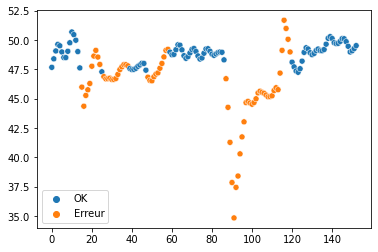

In [99]:
M_markovain("sensor_08","sensor_01")

In [55]:
list_state_sensor1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [56]:
# transitionName = [["S00","S01","S02"],["S10","S11","S12"],["S20","S21","S22"]]

In [57]:
# def activity_forecast(list_state):
#     # Choose the starting state
#     activityNOW = list_state[0]
#     activityList = [activityNOW]
#     i = 0
#     prob = 1
#     while i != len(list_state):
#         if activityToday == 0:
#             change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
#             if change == "01":
#                 prob = prob * transitionMatrix[0][0]
#                 activityToday = 0
#                 activityList.append(0)
#                 pass
#             elif change == "02":
#                 prob = prob * transitionMatrix[0][1]
#                 activityToday = 1
#                 activityList.append(1)
#             else:
#                 prob = prob * transitionMatrix[0][2]
#                 activityToday = 2
#                 activityList.append(2)
#         elif activityToday == 1:
#             change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
#             if change == "10":
#                 prob = prob * transitionMatrix[1][0]
#                 activityToday = 0
#                 activityList.append(0)
#                 pass
#             elif change == "11":
#                 prob = prob * transitionMatrix[1][1]
#                 activityToday = 1
#                 activityList.append(1)
#             else:
#                 prob = prob * transitionMatrix[1][2]
#                 activityToday = 2
#                 activityList.append(2)
#         elif activityToday == 2:
#             change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
#             if change == "20":
#                 prob = prob * transitionMatrix[2][0]
#                 activityToday = 0
#                 activityList.append(0)
#                 pass
#             elif change == "21":
#                 prob = prob * transitionMatrix[2][1]
#                 activityToday = 1
#                 activityList.append(1)
#             else:
#                 prob = prob * transitionMatrix[2][2]
#                 activityToday = 2
#                 activityList.append(2)
#         i += 1    
#     return activityList   

In [58]:
# def trouver_proba_chaque_point(liste_state, transitionMatrix8, transitionName):
#     list_activity = []
#     list_cpt_proba_reel = []# en pourcentage
    
    
    
#     for iterations in range(1,1000):
#         list_activity.append(activity_forecast(len(liste_state)))
#     for i in range(len(liste_state)):
#         count = 0
#         for smaller_list in list_activity:
#             if(smaller_list[i] == liste_state[i]):
#                 count += 1
#         list_cpt_proba_reel.append((count/len(liste_state))* 100)
#     return list_cpt_proba_reel

In [59]:
# def int_to_string_array(list_int):
#     for i in list_int

In [60]:
# trouver_proba_chaque_point(list_state_sensor1, transitionMatrix8, transitionName)

In [61]:
# # To save every activityList
# list_activity = []
# count = 0

# # `Range` starts from the first count up until but excluding the last count
# for iterations in range(1,10000):
#         list_activity.append(activity_forecast(2))

# # Check out all the `activityList` we collected    
# #print(list_activity)

# # Iterate through the list to get a count of all activities ending in state:'Run'
# for smaller_list in list_activity:
#     if(smaller_list[2] == "Run"):
#         count += 1